In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns


# 1

Research about the Spectral Clustering method, and answer the following questions:

![Alt text](image.png)

https://www.youtube.com/watch?v=1p_gchMDoyg

a. In which cases might it be more useful to apply?

When there are different sizes clusters, high dimensional clusters, community detection, noise, networks

b. What are the mathematical fundamentals of it?

c. What is the algorithm to compute it?

![Alt text](image-1.png)

d. Does it hold any relation to some of the concepts previously mentioned in class? Which, and how?

It uses Dimensionality reduction (SVD) to stablish a new space where uses kmeans 

# 2

Research about the DBSCAN method, and answer the following questions

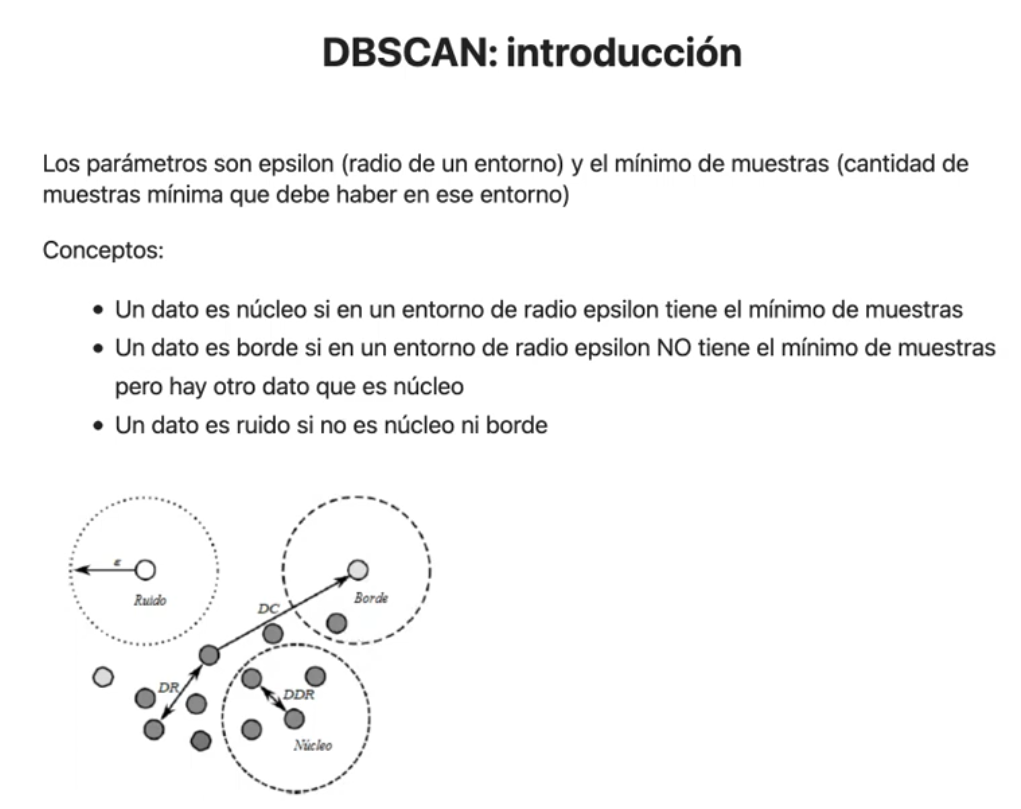

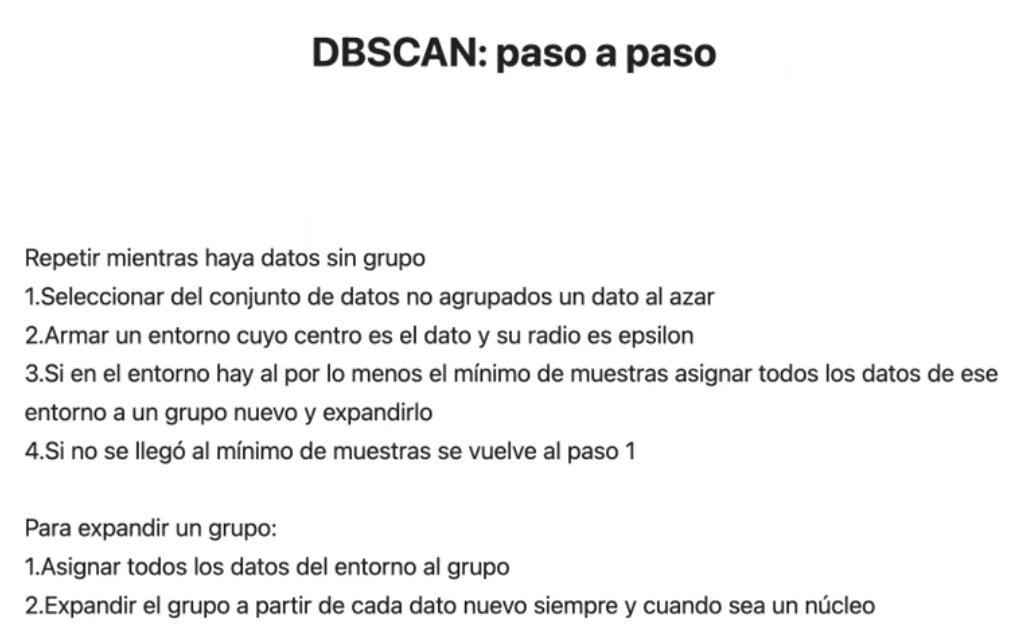

a. In which cases might it be more useful to apply?

It might be usefull in cases of dense areas of points and sparse regions, identifying very well the clusters. Also when there are irregular shapes of clusters, outlier presence, not uniform cluster (density,shape and size) and unknown number of clusters.

b. What are the mathematical fundamentals of it?

DBSCAN is the first density based clustering algorithm. It was proposed by Ester et al. in 1996, and it was designed to cluster data of arbitrary shapes in the presence of noise in spatial and non-spatial high dimensional databases. The key idea of DBSCAN is that for each object of a cluster the neighborhood of a given radius ($Eps$) has to contain at least a minimum number of objects (MinPts), which means that the
cardinality of the neighborhood has to exceed some threshold. The $\epsilon$ neighborhood of an arbitrary point ‘p’ is defined as, 

$N_{Eps}=\{q \in D/dist(p,q)<Eps\}$

Here, D is the database of objects. If the $\epsilon$–neighborhoods of a point P at least contain a minimal number of points, and then this point is called core point. The core point is defined as

$N_{Eps}(P) > MinPts$

Here Eps and MinPts are the user’s specified parameters which mean the radius of the neighborhood and minimum number of points in the $\epsilon$-neighborhood of a core point respectively. If this condition is not satisfied then this point is considered as non-core point

c. Is there any relation between DBSCAN and Spectral Clustering? If so, what is it?

There's no direct relation, but both are nice approaches and could be used together.

# 3

What is the elbow method in clustering? And which flaws does it pose to assess quality?

It try to measure how similar are elements inside a cluster y comparing within cluster sum of squares [WCS] (distance inside) while k clusters are growing. Too many k is hard to apply so, it's nice to take a k where wcs is getting lower but from where it decreases less. 

![Alt text](image-2.png)

# 4

## K-means

In [405]:
import numpy as np

class my_KMeans:
    def __init__(self, n_clusters, max_iters=1000, tol=1e-5, rd_state=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None
        self.rd_state = rd_state

    def fit(self, X):
        n_samples, n_features = X.shape
        
        # Initialize centroids randomly
        if self.rd_state is not None:
            np.random.seed(self.rd_state)
        
        idx = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[idx]
        
        for i in range(self.max_iters):
            # Assign each data point to the nearest centroid
            distances = self._calc_distances(X)
            self.labels = np.argmin(distances, axis=1)
            
            # Update centroids
            new_centroids = np.zeros((self.n_clusters, n_features))
            for j in range(self.n_clusters):
                new_centroids[j] = np.mean(X[self.labels == j], axis=0)
                
            # Check for convergence
            if np.sum(np.abs(new_centroids - self.centroids)) < self.tol:
                break
                
            self.centroids = new_centroids            
            
    def predict(self, X):
        distances = self._calc_distances(X)
        return np.argmin(distances, axis=1)
        
    def _calc_distances(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(self.centroids):
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)
        return distances



## K - medoids

In [406]:
import numpy as np

class my_KMedoids:
    def __init__(self, n_clusters, max_iters=1000, tol=1e-5):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.medoids = None
        self.labels = None
        
    def fit(self, X):
        n_samples, n_features = X.shape
        
        # Initialize centroids randomly
        idx = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.medoids = X[idx]
        
        for i in range(self.max_iters):
            # Assign each data point to the nearest medoid
            distances = self._calc_distances(X)
            self.labels = np.argmin(distances, axis=1)
            
            # Update centroids
            new_medoids = np.zeros((self.n_clusters, n_features))
            for j in range(self.n_clusters):
                new_medoids[j] = np.median(X[self.labels == j], axis=0)
                
            # Check for convergence
            if np.sum(np.abs(new_medoids - self.medoids)) < self.tol:
                break
                
            self.medoids = new_medoids
            
    def predict(self, X):
        distances = self._calc_distances(X)
        return np.argmin(distances, axis=1)
        
    def _calc_distances(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(self.medoids):
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)
        return distances
    


## Silhouette

In [407]:
import numpy as np

class my_Silhouette:
    def __init__(self,X,labels):
        self.ai = None
        self.bi = None
        self.si = None
        self.cluster = None
        self.all_info = None
        self.excecute_sl(X,labels)
        # return self.excecute_sl(X,labels)
        # excecute_sl(X,labels)

        
    def excecute_sl(self, X,labels):
        # calculate distances for all combinations, repeating, and saving in dict
        distance_dict = dict()
        array_range = range(len(X))
        idx_combination = np.array(np.meshgrid(array_range,array_range)).T.reshape(-1,2)
        for point_1, point_2 in idx_combination:
            label_point_1 = labels[point_1]
            label_point_2 = labels[point_2]
            distance_dict[(point_1, label_point_1, point_2, label_point_2)] = np.linalg.norm(X[point_1] - X[point_2])


        #ai: average distances intracluster
        #bi: average distances with min neighbor
        si_dict = dict()
        for i in range(len(X)):#loop over labels
            label = labels[i]
            len_label = len(labels[labels == label])
            ai = sum(value for key, value in distance_dict.items() if (key[0] == i and key[3] == label))/(len_label-1) 
            bi = list()
            for other_label in set(labels[labels != label]):
                len_other_label = len(labels[labels == other_label])
                bi.append(sum(value for key, value in distance_dict.items() if (key[0] == i and key[3] == other_label))/(len_other_label-1))
            bi = min(bi)
            if ai<bi and bi!=0:
                si = 1-ai/bi
            elif ai==bi:
                si = 0
            elif ai>bi and ai!=0:
                si = (bi/ai)-1
            si_dict[i] = ai,bi,si,label

        self.all_info = si_dict
        self.ai = list({key: value[0] for key, value in si_dict.items()}.values())
        self.bi = list({key: value[1] for key, value in si_dict.items()}.values())
        self.si = list({key: value[2] for key, value in si_dict.items()}.values())
        self.cluster = list({key: value[3] for key, value in si_dict.items()}.values())
        self.all_info = si_dict

        # return list({key: value[2] for key, value in si_dict.items()}.values())

            
            

With this step by step formulation, can be returnet each element to analyze: $a_i , b_i , s_i$ and all info inside a dict

In [393]:
# silueta = my_Silhouette(matriz,etiquetas)
# silueta.si

[0.7867154800389248,
 0.6730785210929069,
 0.8055043753446011,
 0.7092399179525977,
 0.42118037008756914,
 0.7711062354283871,
 0.8027701899060371,
 0.5080076045903308,
 0.06756660990087937,
 0.4514965614119628,
 0.5543568332613651,
 0.47323019722915605,
 0.74722346884388,
 0.4618887286430231,
 0.5642855092112409,
 0.7940955410208053,
 0.7716819545421562,
 0.7556553970834927,
 0.7929028877745693,
 0.7895094437730442,
 0.6275695551639835,
 0.6610641394831815,
 0.525941624908889,
 0.7895525606918159,
 0.796203525858949,
 0.7737964734201256,
 0.7407275819064054,
 0.6632690924643432,
 0.7440448967809927,
 0.49865420133778415,
 0.47752233835726443,
 0.7675447203950279,
 0.8021057348735512,
 0.6038899430307254,
 0.7797233674750604,
 0.3622346095072765,
 0.699368345413712,
 0.6260275193184426,
 0.7217651949809623,
 0.090392475013932,
 0.6936045810831388,
 0.7402709754781045,
 0.7210025301198305,
 0.24326128179995032,
 0.26750848596787513,
 0.6896636924834552,
 0.41604938093406574,
 0.77544292

In [396]:
# silueta.all_info

{0: (1.5567078873848903, 7.298738265997888, 0.7867154800389248, 3),
 1: (1.7178534369140008, 5.254636197832056, 0.6730785210929069, 3),
 2: (1.2934842762271292, 6.650454366358539, 0.8055043753446011, 2),
 3: (2.3011957545305526, 7.9144143113682, 0.7092399179525977, 3),
 4: (1.4250984785764285, 2.4620769665189663, 0.42118037008756914, 0),
 5: (1.3915397966588157, 6.079413300153272, 0.7711062354283871, 2),
 6: (1.4375372304304312, 7.2886407472864745, 0.8027701899060371, 3),
 7: (2.8632418743083914, 5.819687257410239, 0.5080076045903308, 2),
 8: (1.783770656920464, 1.913027435376208, 0.06756660990087937, 0),
 9: (1.4843141033900786, 2.7061163138940647, 0.4514965614119628, 1),
 10: (2.5473421602450808, 5.716102815818717, 0.5543568332613651, 2),
 11: (1.2218775113432923, 2.319566355011498, 0.47323019722915605, 1),
 12: (2.0657537617191726, 8.172252986743143, 0.74722346884388, 3),
 13: (1.1115193705098714, 2.0655939202070757, 0.4618887286430231, 1),
 14: (2.434662922550653, 5.58774833984352,

In [399]:
# # Extract elements and silhouette coefficients as separate lists
# elements = list(silueta.all_info.keys())
# silhouette_values = list({key: value[2] for key, value in silueta.all_info.items()}.values())
# silhouette_clusters = list({key: value[3] for key, value in silueta.all_info.items()}.values())

In [140]:
# matriz = X
# kmeans = my_KMeans(4,rd_state=3)
# kmeans.fit(matriz)
# etiquetas = kmeans.labels
# etiquetas

array([3, 3, 2, 3, 0, 2, 3, 2, 0, 1, 2, 1, 3, 1, 2, 3, 2, 3, 3, 2, 3, 2,
       0, 2, 2, 2, 3, 2, 2, 3, 1, 3, 3, 2, 2, 1, 2, 2, 2, 1, 2, 2, 3, 1,
       0, 3, 0, 3, 3, 3, 3, 2, 0, 2, 3, 1, 3, 3, 0, 3, 1, 3, 3, 2, 2, 0,
       3, 3, 2, 2, 2, 1, 3, 1, 3, 2, 3, 3, 2, 3, 0, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 1, 2, 0, 0, 0, 2, 0, 1, 1, 2, 0, 3, 3, 3, 3, 0, 3, 2, 2, 2,
       2, 3, 3, 3, 2, 1, 3, 2, 0, 0, 0, 2, 2, 2, 1, 0, 2, 3, 3, 2, 0, 2,
       3, 2, 3, 0, 0, 3, 1, 3, 2, 3, 1, 2, 2, 2, 3, 0, 1, 2, 3, 2, 1, 0,
       3, 1, 0, 0, 3, 3, 2, 0, 2, 1, 3, 3, 0, 2, 3, 1, 2, 3, 2, 3, 3, 0,
       0, 1, 3, 2, 1, 1, 3, 2, 2, 2, 2, 2, 3, 1, 2, 1, 1, 2, 1, 2, 1, 1,
       2, 2, 0, 1, 1, 0, 3, 0, 1, 3, 2, 2, 0, 2, 2, 3, 3, 1, 0, 0, 1, 2,
       2, 2, 1, 3, 2, 2, 1, 2, 3, 2, 3, 1, 1, 0, 0, 3, 3, 0, 0, 2, 2, 3,
       2, 0, 3, 0, 3, 3, 3, 2, 2, 0, 2, 3, 1, 1, 2, 3, 0, 1, 2, 3, 0, 3,
       2, 3, 3, 3, 0, 3, 0, 3, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 3, 2, 3,
       2, 0, 1, 2, 2, 1, 3, 3, 0, 0, 2, 3, 0, 1, 1,

In [336]:
# %%time
# # calculate distances for all combinations, repeating, and saving in dict
# distance_dict = dict()
# array_range = range(len(matriz))
# idx_combination = np.array(np.meshgrid(array_range,array_range)).T.reshape(-1,2)
# for point_1, point_2 in idx_combination:
#     label_point_1 = etiquetas[point_1]
#     label_point_2 = etiquetas[point_2]
#     distance_dict[(point_1, label_point_1, point_2, label_point_2)] = np.linalg.norm(matriz[point_1] - matriz[point_2])


# #ai: average distances intracluster
# #bi: average distances with min neighbor
# si_dict = dict()
# for i in range(len(matriz)):#loop over labels
#     label = etiquetas[i]
#     len_label = len(etiquetas[etiquetas == label])
#     ai = sum(value for key, value in distance_dict.items() if (key[0] == i and key[3] == label))/(len_label-1) 
#     bi = list()
#     for other_label in set(etiquetas[etiquetas != label]):
#         len_other_label = len(etiquetas[etiquetas == other_label])
#         bi.append(sum(value for key, value in distance_dict.items() if (key[0] == i and key[3] == other_label))/(len_other_label-1))
#     bi = min(bi)
#     if ai<bi and bi!=0:
#         si = 1-ai/bi
#     elif ai==bi:
#         si = 0
#     elif ai>bi and ai!=0:
#         si = (bi/ai)-1
#     si_dict[i] = ai,bi,si,label


CPU times: total: 1min 1s
Wall time: 1min 1s


In [400]:
# import pandas as pd
# df_silhouette = pd.DataFrame.from_dict(silueta.all_info, orient='index', columns=['ai','bi','si','cluster']).reset_index().rename(columns={'index':'element'})
# df_silhouette = df_silhouette.sort_values(['cluster','si'])
# df_silhouette

,element,ai,bi,si,cluster
438,438,1.724829,1.822016,0.053340,0
8,8,1.783771,1.913027,0.067567,0
317,317,1.754388,1.899792,0.076536,0
100,100,2.128121,2.411120,0.117372,0
348,348,1.761959,2.030483,0.132247,0
...,...,...,...,...,...
265,265,1.349082,7.154148,0.811427,3
375,375,1.265320,6.754964,0.812683,3
127,127,1.256750,6.736446,0.813440,3
334,334,1.309331,7.025653,0.813636,3


In [401]:
# df_silhouette.groupby('cluster')['si'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,81.0,0.369091,0.132285,0.053340,0.270276,0.405037,0.477820,0.543305
1,86.0,0.292263,0.141672,-0.068731,0.189336,0.301820,0.428026,0.487708
2,167.0,0.692302,0.114578,0.207899,0.642895,0.723787,0.776114,0.809404
3,166.0,0.730454,0.086278,0.287713,0.711040,0.758619,0.786158,0.813653


# 5

a. Let’s use the newly created modules in unsupervised to cluster some toy data.

In [8]:
from sklearn.datasets import make_blobs
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)

b. Plot the resulting dataset. How many clusters are there? How far are they from one another?

There are crearly 3 cluster with similar distancies when comparing clusters. 

<Axes: >

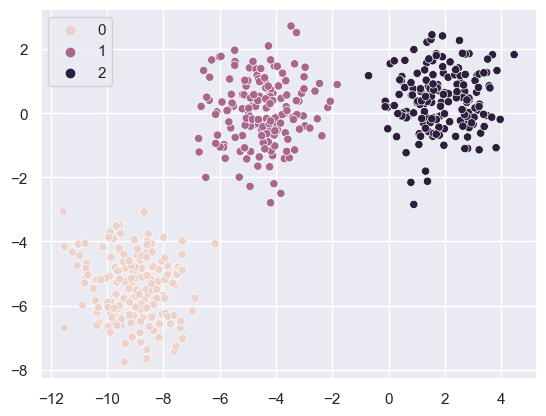

In [413]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)

c. For both k-means and k-medoids (your implementations), calculate the silhouette plots and coefficients for each run, iterating K from 1 to 5 clusters.

kmeans

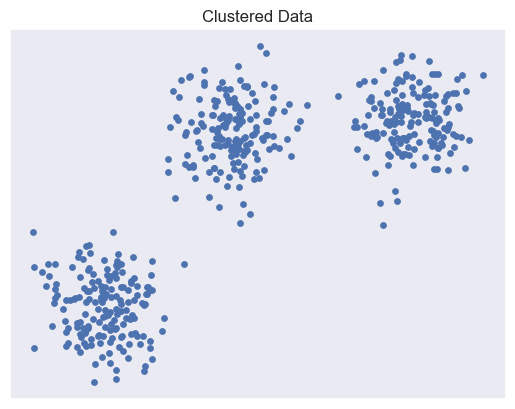

In [440]:
# Initialize KMeans
kmeans_1 = my_KMeans(n_clusters=1)

# fit the data & predict cluster labels
kmeans_1.fit(X)
predicted_labels = kmeans_1.predict(X)


# Based on predicted_labels, we assign each data point distinct colour
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]
for k, col in enumerate(colors):
    cluster_data = predicted_labels == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], s=15)

    
plt.title("Clustered Data")
plt.xticks([])
plt.yticks([])
plt.show()



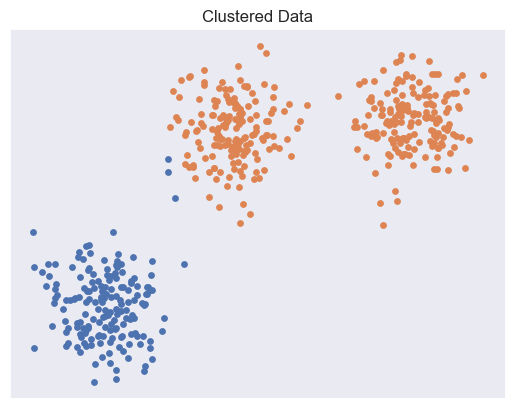

In [428]:
# Initialize KMeans
kmeans_2 = my_KMeans(n_clusters=2)

# fit the data & predict cluster labels
kmeans_2.fit(X)
predicted_labels = kmeans_2.predict(X)


# Based on predicted_labels, we assign each data point distinct colour
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]
for k, col in enumerate(colors):
    cluster_data = predicted_labels == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], s=15)

    
plt.title("Clustered Data")
plt.xticks([])
plt.yticks([])
plt.show()



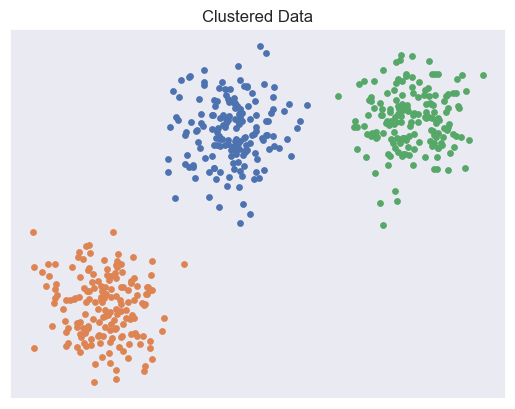

In [429]:
# Initialize KMeans
kmeans_3 = my_KMeans(n_clusters=3)

# fit the data & predict cluster labels
kmeans_3.fit(X)
predicted_labels = kmeans_3.predict(X)


# Based on predicted_labels, we assign each data point distinct colour
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]
for k, col in enumerate(colors):
    cluster_data = predicted_labels == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], s=15)

    
plt.title("Clustered Data")
plt.xticks([])
plt.yticks([])
plt.show()



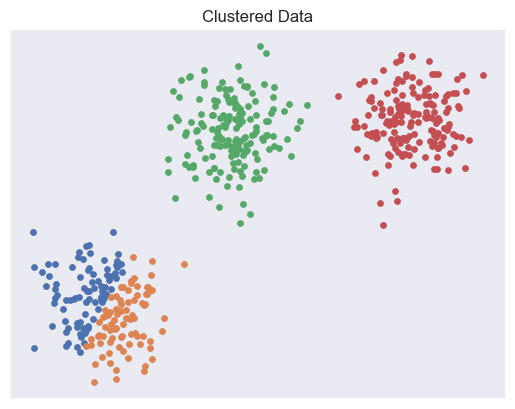

In [430]:
# Initialize KMeans
kmeans_4 = my_KMeans(n_clusters=4)

# fit the data & predict cluster labels
kmeans_4.fit(X)
predicted_labels = kmeans_4.predict(X)


# Based on predicted_labels, we assign each data point distinct colour
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]
for k, col in enumerate(colors):
    cluster_data = predicted_labels == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], s=15)

    
plt.title("Clustered Data")
plt.xticks([])
plt.yticks([])
plt.show()



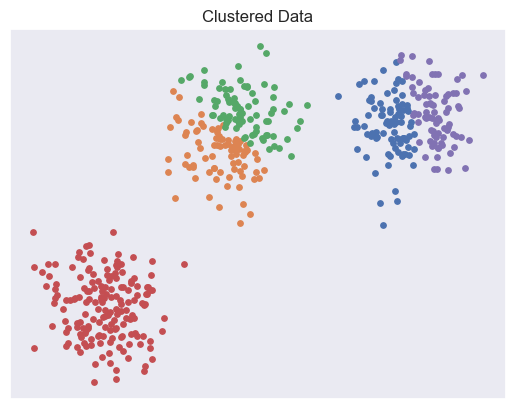

In [431]:
# Initialize KMeans
kmeans_5 = my_KMeans(n_clusters=5)

# fit the data & predict cluster labels
kmeans_5.fit(X)
predicted_labels = kmeans_5.predict(X)


# Based on predicted_labels, we assign each data point distinct colour
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m", "#00FF00"]
for k, col in enumerate(colors):
    cluster_data = predicted_labels == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], s=15)

    
plt.title("Clustered Data")
plt.xticks([])
plt.yticks([])
plt.show()



Kmedoids

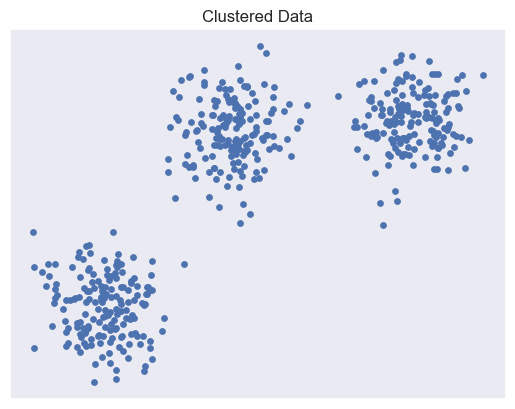

In [432]:
# Initialize KMedoids
kmedoids_1 = my_KMedoids(n_clusters=1)

# fit the data & predict cluster labels
kmedoids_1.fit(X)
predicted_labels = kmedoids_1.predict(X)


# Based on predicted_labels, we assign each data point distinct colour
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]
for k, col in enumerate(colors):
    cluster_data = predicted_labels == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], s=15)

    
plt.title("Clustered Data")
plt.xticks([])
plt.yticks([])
plt.show()



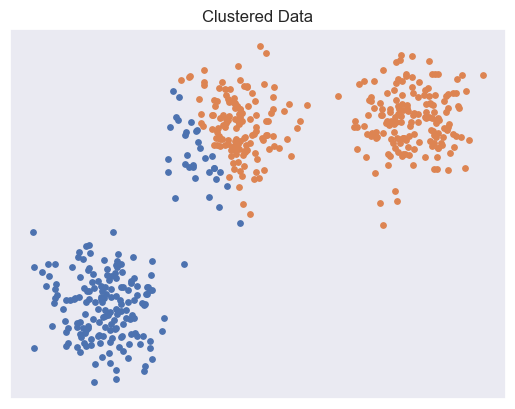

In [433]:
# Initialize KMedoids
kmedoids_2 = my_KMedoids(n_clusters=2)

# fit the data & predict cluster labels
kmedoids_2.fit(X)
predicted_labels = kmedoids_2.predict(X)


# Based on predicted_labels, we assign each data point distinct colour
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]
for k, col in enumerate(colors):
    cluster_data = predicted_labels == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], s=15)

    
plt.title("Clustered Data")
plt.xticks([])
plt.yticks([])
plt.show()



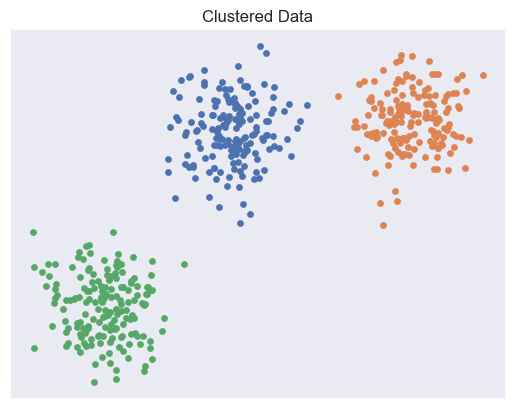

In [434]:
# Initialize KMedoids
kmedoids_3 = my_KMedoids(n_clusters=3)

# fit the data & predict cluster labels
kmedoids_3.fit(X)
predicted_labels = kmedoids_3.predict(X)


# Based on predicted_labels, we assign each data point distinct colour
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]
for k, col in enumerate(colors):
    cluster_data = predicted_labels == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], s=15)

    
plt.title("Clustered Data")
plt.xticks([])
plt.yticks([])
plt.show()



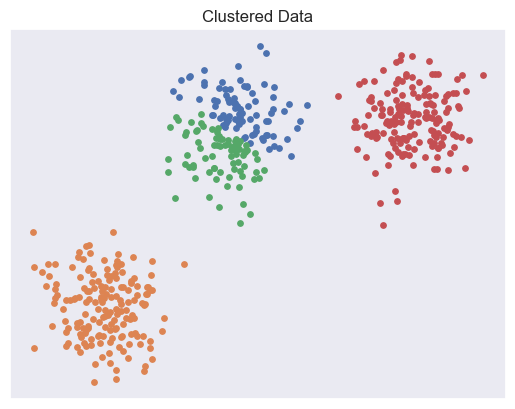

In [435]:
# Initialize KMedoids
kmedoids_4 = my_KMedoids(n_clusters=4)

# fit the data & predict cluster labels
kmedoids_4.fit(X)
predicted_labels = kmedoids_4.predict(X)


# Based on predicted_labels, we assign each data point distinct colour
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]
for k, col in enumerate(colors):
    cluster_data = predicted_labels == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], s=15)

    
plt.title("Clustered Data")
plt.xticks([])
plt.yticks([])
plt.show()



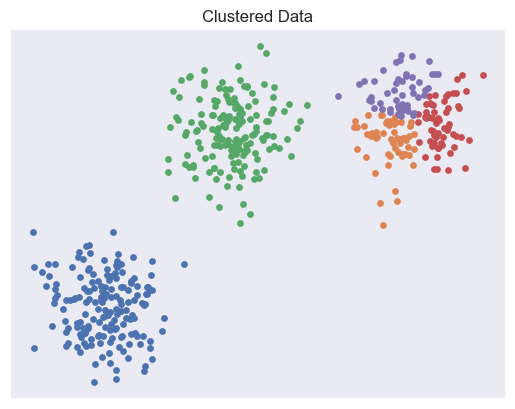

In [436]:
# Initialize KMedoids
kmedoids_5 = my_KMedoids(n_clusters=5)

# fit the data & predict cluster labels
kmedoids_5.fit(X)
predicted_labels = kmedoids_5.predict(X)


# Based on predicted_labels, we assign each data point distinct colour
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m","#00FF00"]
for k, col in enumerate(colors):
    cluster_data = predicted_labels == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], s=15)

    
plt.title("Clustered Data")
plt.xticks([])
plt.yticks([])
plt.show()



d. What number of K got the best silhouette score? What can you say about the figures? Is this the
expected result?

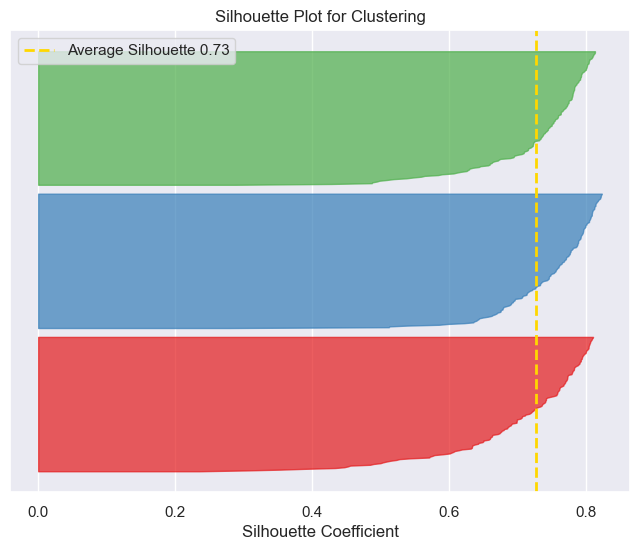

CPU times: total: 42.3 s
Wall time: 42.7 s


In [447]:
%%time
# using my own algotithm
# Extract elements and silhouette coefficients as separate lists

silueta = my_Silhouette(X,kmeans_3.labels)
elements = list(silueta.all_info.keys())
silhouette_values = list({key: value[2] for key, value in silueta.all_info.items()}.values())
silhouette_clusters = list({key: value[3] for key, value in silueta.all_info.items()}.values())

cluster_colors = sns.color_palette("Set1", n_colors=len(set(silhouette_clusters)))
sns.set()
fig, ax1 = plt.subplots(figsize=(8, 6))
y_lower = 10

for i, cluster_id in enumerate(set(silhouette_clusters)):
    cluster_silhouette_values = [silhouette_values[j] for j, cluster in enumerate(silhouette_clusters) if cluster == cluster_id]
    cluster_silhouette_values.sort()

    size_cluster_i = len(cluster_silhouette_values)
    y_upper = y_lower + size_cluster_i

    color = cluster_colors[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    y_lower = y_upper + 10

ax1.set_yticks([])
ax1.set_xlabel('Silhouette Coefficient')
ax1.set_title('Silhouette Plot for Clustering')

# Add a vertical line at the average silhouette coefficient
average_silhouette = np.mean(silhouette_values)
ax1.axvline(x=average_silhouette, color='gold', linestyle='--', label='Average Silhouette ' +str(round(average_silhouette,2)), linewidth=2)
ax1.legend(loc='best')

# Show the plot
plt.show()

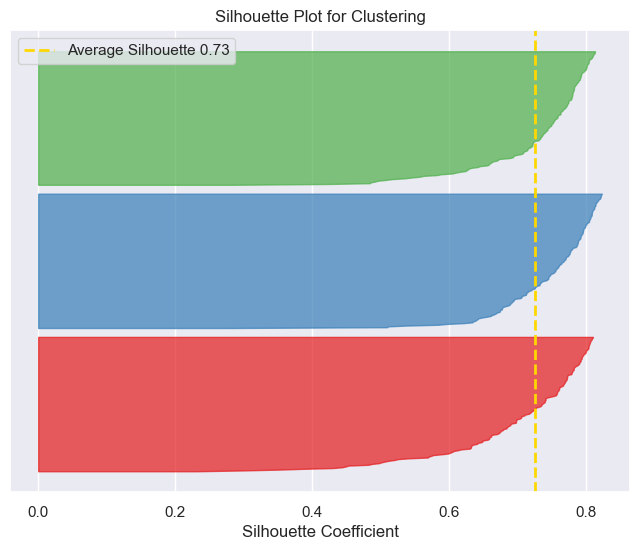

CPU times: total: 875 ms
Wall time: 245 ms


In [448]:
%%time
# using skl
# Extract elements and silhouette coefficients as separate lists
from sklearn import metrics
metrics.silhouette_samples(X, kmeans_3.labels)

elements = range(len(X))
silhouette_values = metrics.silhouette_samples(X, kmeans_3.labels)
silhouette_clusters = kmeans_3.labels

cluster_colors = sns.color_palette("Set1", n_colors=len(set(silhouette_clusters)))
sns.set()
fig, ax1 = plt.subplots(figsize=(8, 6))
y_lower = 10

for i, cluster_id in enumerate(set(silhouette_clusters)):
    cluster_silhouette_values = [silhouette_values[j] for j, cluster in enumerate(silhouette_clusters) if cluster == cluster_id]
    cluster_silhouette_values.sort()

    size_cluster_i = len(cluster_silhouette_values)
    y_upper = y_lower + size_cluster_i

    color = cluster_colors[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    y_lower = y_upper + 10

ax1.set_yticks([])
ax1.set_xlabel('Silhouette Coefficient')
ax1.set_title('Silhouette Plot for Clustering')

# Add a vertical line at the average silhouette coefficient
average_silhouette = np.mean(silhouette_values)
ax1.axvline(x=average_silhouette, color='gold', linestyle='--', label='Average Silhouette ' +str(round(average_silhouette,2)), linewidth=2)
ax1.legend(loc='best')

# Show the plot
plt.show()

In [442]:
from sklearn.metrics import silhouette_score
# print('K=1:',silhouette_score(X, kmeans_1.labels))
print('K=2:',silhouette_score(X, kmeans_2.labels))
print('K=3:',silhouette_score(X, kmeans_3.labels))
print('K=4:',silhouette_score(X, kmeans_4.labels))
print('K=5:',silhouette_score(X, kmeans_5.labels))

K=2: 0.6274472426807147
K=3: 0.7254535864779077
K=4: 0.5807110480643375
K=5: 0.46262270793905264


In [443]:
from sklearn.metrics import silhouette_score
# print('K=1:',silhouette_score(X, kmeans_1.labels))
print('K=2:',silhouette_score(X, kmedoids_2.labels))
print('K=3:',silhouette_score(X, kmedoids_3.labels))
print('K=4:',silhouette_score(X, kmedoids_4.labels))
print('K=5:',silhouette_score(X, kmedoids_5.labels))

K=2: 0.5815804427901142
K=3: 0.7254535864779077
K=4: 0.5777957349725914
K=5: 0.5907381617610526


In the case of k-means and k-medoids, best silhouette_score comes from K=3. It's what we were waiting, due to the set of points generated. 

# 6

Use the following code snippet to create different types of scattered data:

In [3]:
import numpy as np
from sklearn import cluster, datasets, mixture
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

## noisy_circles

<Axes: >

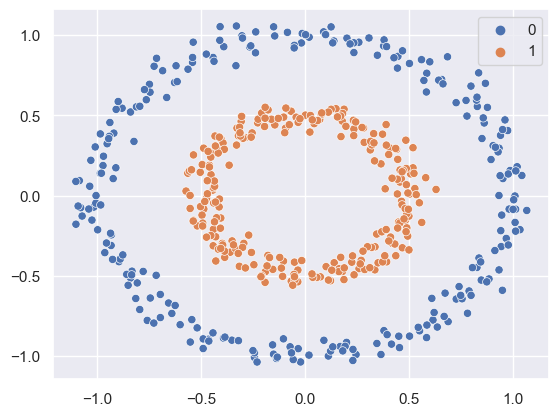

In [457]:
sns.scatterplot(x = noisy_circles[0][:,0], y = noisy_circles[0][:,1],hue=noisy_circles[1])

<AxesSubplot:>

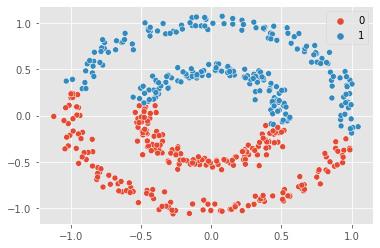

In [13]:
from sklearn.cluster import KMeans
X = noisy_circles[0]
noisy_circles_kmeans_2 = KMeans(n_clusters=2, random_state=0).fit(X)
sns.scatterplot(x = noisy_circles[0][:,0], y = noisy_circles[0][:,1], hue=noisy_circles_kmeans_2.labels_)

In [15]:
# !pip install scikit-learn-extra

     -------------------------------------- 346.2/346.2 kB 2.7 MB/s eta 0:00:00


<AxesSubplot:>

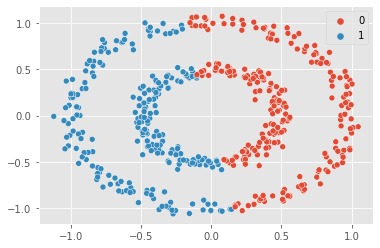

In [17]:
from sklearn_extra.cluster import KMedoids
X = noisy_circles[0]
noisy_circles_KMedoids_2 = KMedoids(n_clusters=2, random_state=0).fit(X)
sns.scatterplot(x = noisy_circles[0][:,0], y = noisy_circles[0][:,1], hue=noisy_circles_KMedoids_2.labels_)

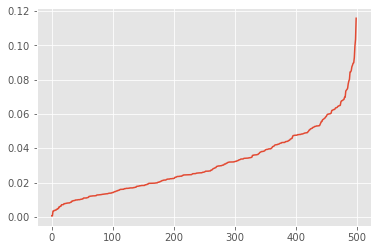

In [54]:
#https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

<AxesSubplot:>

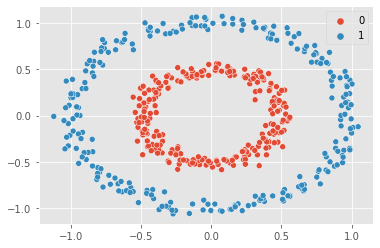

In [76]:
from sklearn.cluster import DBSCAN

X = noisy_circles[0]
noisy_circles_DBSCAN = DBSCAN(eps=0.26, min_samples=10).fit(X)
sns.scatterplot(x = noisy_circles[0][:,0], y = noisy_circles[0][:,1], hue=noisy_circles_DBSCAN.labels_)

<AxesSubplot:>

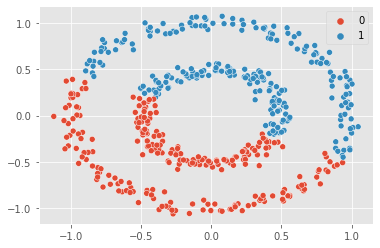

In [80]:
from sklearn.cluster import SpectralClustering

X = noisy_circles[0]
noisy_circles_SpectralClustering = SpectralClustering(n_clusters=2,n_components=2,random_state=0,eigen_solver='arpack').fit(X)
sns.scatterplot(x = noisy_circles[0][:,0], y = noisy_circles[0][:,1], hue=noisy_circles_SpectralClustering.labels_)

DB Scan can adapt but also may be overfitting.

## noisy_moons

<Axes: >

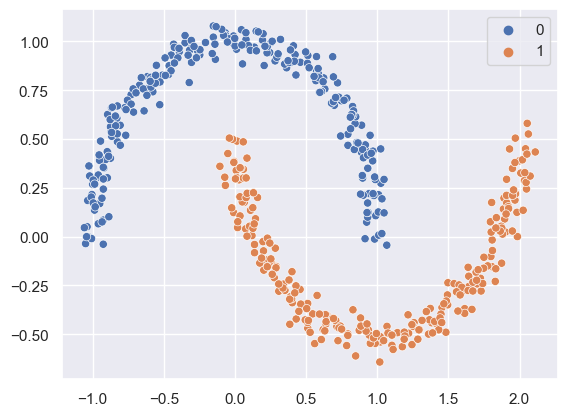

In [459]:
sns.scatterplot(x = noisy_moons[0][:,0], y = noisy_moons[0][:,1],hue=noisy_moons[1])


<AxesSubplot:>

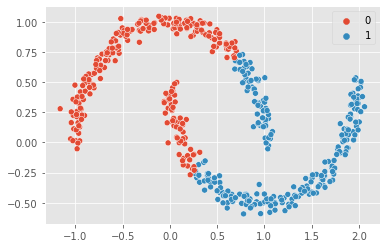

In [82]:
from sklearn.cluster import KMeans
X = noisy_moons[0]
noisy_moons_kmeans_2 = KMeans(n_clusters=2, random_state=0).fit(X)
sns.scatterplot(x = noisy_moons[0][:,0], y = noisy_moons[0][:,1], hue=noisy_moons_kmeans_2.labels_)

<AxesSubplot:>

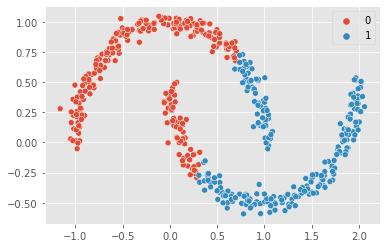

In [81]:
from sklearn_extra.cluster import KMedoids
X = noisy_moons[0]
noisy_moons_KMedoids_2 = KMedoids(n_clusters=2, random_state=0).fit(X)
sns.scatterplot(x = noisy_moons[0][:,0], y = noisy_moons[0][:,1], hue=noisy_moons_KMedoids_2.labels_)



<AxesSubplot:>

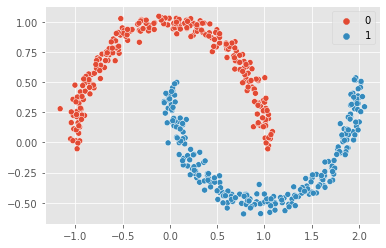

In [83]:
from sklearn.cluster import DBSCAN

X = noisy_moons[0]
noisy_moons_DBSCAN = DBSCAN(eps=0.26, min_samples=10).fit(X)
sns.scatterplot(x = noisy_moons[0][:,0], y = noisy_moons[0][:,1], hue=noisy_moons_DBSCAN.labels_)

<AxesSubplot:>

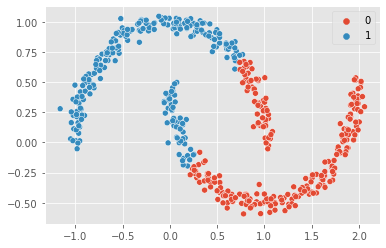

In [84]:
from sklearn.cluster import SpectralClustering

X = noisy_moons[0]
noisy_moons_SpectralClustering = SpectralClustering(n_clusters=2,n_components=2,random_state=0,eigen_solver='arpack').fit(X)
sns.scatterplot(x = noisy_moons[0][:,0], y = noisy_moons[0][:,1], hue=noisy_moons_SpectralClustering.labels_)

DB Scan works nice

## blobs

<Axes: >

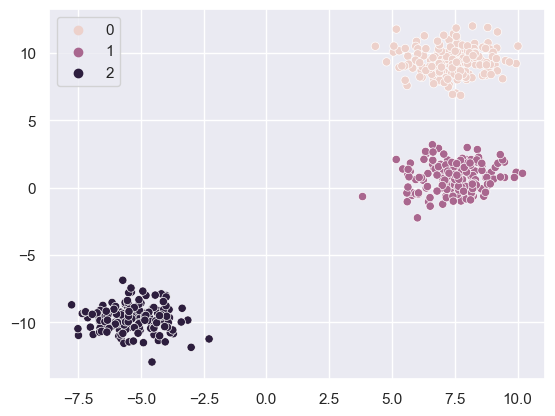

In [462]:
sns.scatterplot(x = blobs[0][:,0], y = blobs[0][:,1],hue=blobs[1])


<AxesSubplot:>

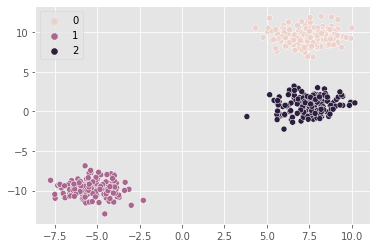

In [86]:
from sklearn.cluster import KMeans
X = blobs[0]
blobs_kmeans_2 = KMeans(n_clusters=3, random_state=0).fit(X)
sns.scatterplot(x = blobs[0][:,0], y = blobs[0][:,1], hue=blobs_kmeans_2.labels_)

<AxesSubplot:>

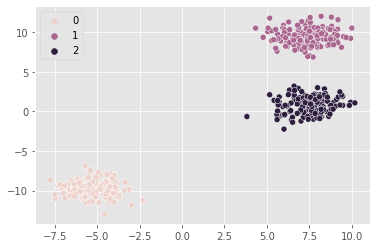

In [87]:
from sklearn_extra.cluster import KMedoids
X = blobs[0]
blobs_KMedoids_2 = KMedoids(n_clusters=3, random_state=0).fit(X)
sns.scatterplot(x = blobs[0][:,0], y = blobs[0][:,1], hue=blobs_KMedoids_2.labels_)

<AxesSubplot:>

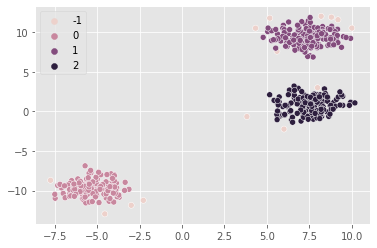

In [97]:
from sklearn.cluster import DBSCAN

X = blobs[0]
blobs_DBSCAN = DBSCAN(eps=0.7, min_samples=5).fit(X)
sns.scatterplot(x = blobs[0][:,0], y = blobs[0][:,1], hue=blobs_DBSCAN.labels_)

<AxesSubplot:>

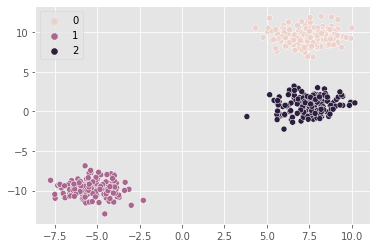

In [98]:
from sklearn.cluster import SpectralClustering

X = blobs[0]
blobs_SpectralClustering = SpectralClustering(n_clusters=3,n_components=2,random_state=0,eigen_solver='arpack').fit(X)
sns.scatterplot(x = blobs[0][:,0], y = blobs[0][:,1], hue=blobs_SpectralClustering.labels_)

## no_structure

<Axes: >

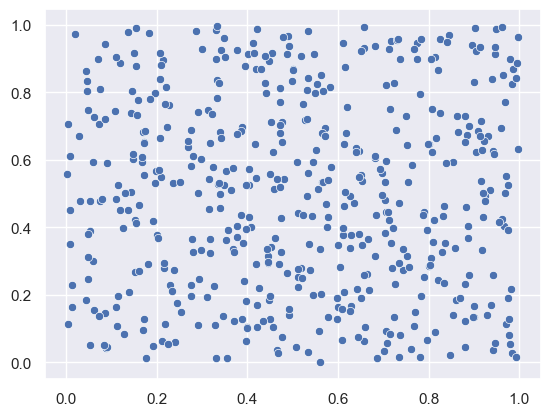

In [465]:
sns.scatterplot(x = no_structure[0][:,0], y = no_structure[0][:,1],hue=no_structure[1])

<AxesSubplot:>

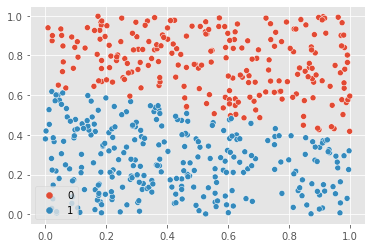

In [99]:
from sklearn.cluster import KMeans
X = no_structure[0]
no_structure_kmeans_2 = KMeans(n_clusters=2, random_state=0).fit(X)
sns.scatterplot(x = no_structure[0][:,0], y = no_structure[0][:,1], hue=no_structure_kmeans_2.labels_)

<AxesSubplot:>

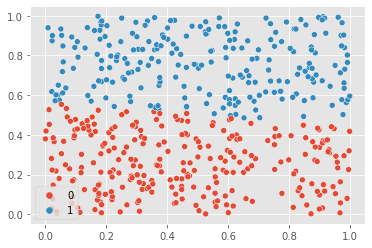

In [100]:
from sklearn_extra.cluster import KMedoids
X = no_structure[0]
no_structure_KMedoids_2 = KMedoids(n_clusters=2, random_state=0).fit(X)
sns.scatterplot(x = no_structure[0][:,0], y = no_structure[0][:,1], hue=no_structure_KMedoids_2.labels_)

<AxesSubplot:>

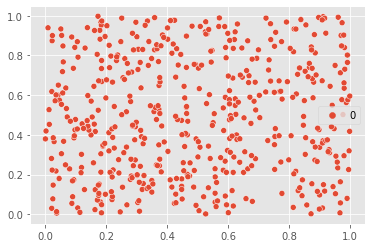

In [105]:
from sklearn.cluster import DBSCAN

X = no_structure[0]
no_structure_DBSCAN = DBSCAN(eps=0.08, min_samples=5).fit(X)
sns.scatterplot(x = no_structure[0][:,0], y = no_structure[0][:,1], hue=no_structure_DBSCAN.labels_)

<AxesSubplot:>

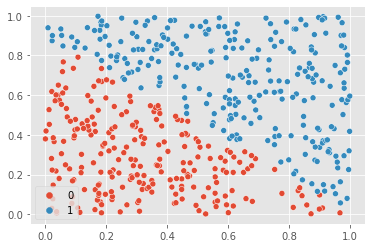

In [106]:
from sklearn.cluster import SpectralClustering

X = no_structure[0]
no_structure_SpectralClustering = SpectralClustering(n_clusters=2,n_components=2,random_state=0,eigen_solver='arpack').fit(X)
sns.scatterplot(x = no_structure[0][:,0], y = no_structure[0][:,1], hue=no_structure_SpectralClustering.labels_)

There's no structure, so algorithms try to find some pattern. Maybe Spectral does a good job by using 2-dimension kind to stablish a difference betweeen elements.

## aniso

<Axes: >

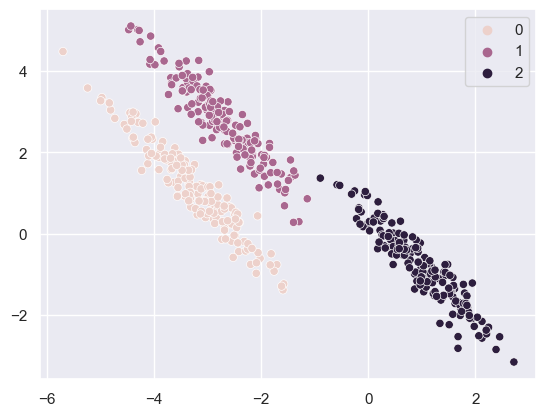

In [467]:
sns.scatterplot(x = aniso[0][:,0], y = aniso[0][:,1],hue=aniso[1])


<AxesSubplot:>

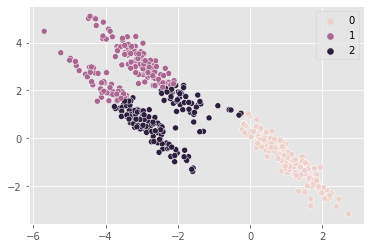

In [107]:
from sklearn.cluster import KMeans
X = aniso[0]
aniso_kmeans_2 = KMeans(n_clusters=3, random_state=0).fit(X)
sns.scatterplot(x = aniso[0][:,0], y = aniso[0][:,1], hue=aniso_kmeans_2.labels_)

<AxesSubplot:>

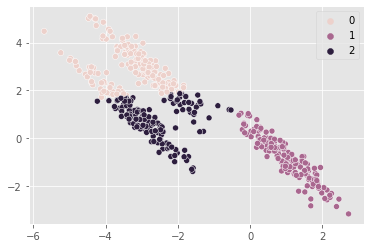

In [108]:
from sklearn_extra.cluster import KMedoids
X = aniso[0]
aniso_KMedoids_3 = KMedoids(n_clusters=3, random_state=0).fit(X)
sns.scatterplot(x = aniso[0][:,0], y = aniso[0][:,1], hue=aniso_KMedoids_3.labels_)

<AxesSubplot:>

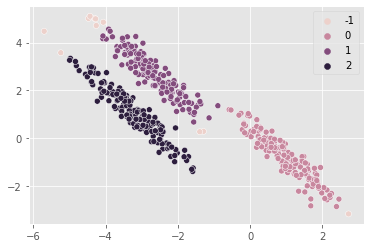

In [122]:
from sklearn.cluster import DBSCAN

X = aniso[0]
aniso_DBSCAN = DBSCAN(eps=0.5, min_samples=10).fit(X)
sns.scatterplot(x = aniso[0][:,0], y = aniso[0][:,1], hue=aniso_DBSCAN.labels_)

<AxesSubplot:>

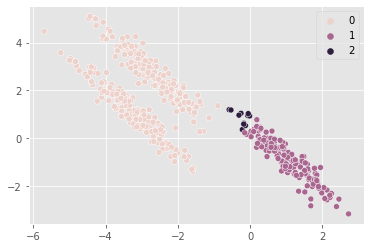

In [124]:
from sklearn.cluster import SpectralClustering

X = aniso[0]
aniso_SpectralClustering = SpectralClustering(n_clusters=3,n_components=2,random_state=0).fit(X)
sns.scatterplot(x = aniso[0][:,0], y = aniso[0][:,1], hue=aniso_SpectralClustering.labels_)

DB scan seems good

## varied

<Axes: >

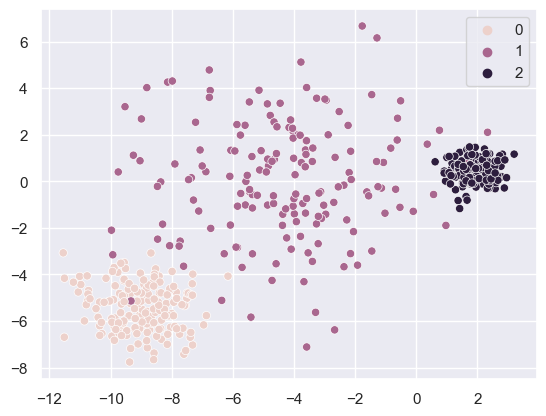

In [469]:
sns.scatterplot(x = varied[0][:,0], y = varied[0][:,1],hue=varied[1])


<AxesSubplot:>

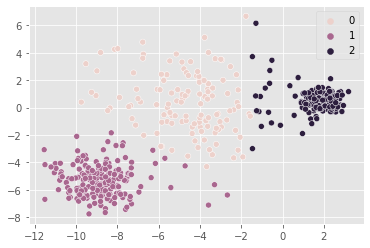

In [125]:
from sklearn.cluster import KMeans
X = varied[0]
varied_kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(X)
sns.scatterplot(x = varied[0][:,0], y = varied[0][:,1], hue=varied_kmeans_3.labels_)

<AxesSubplot:>

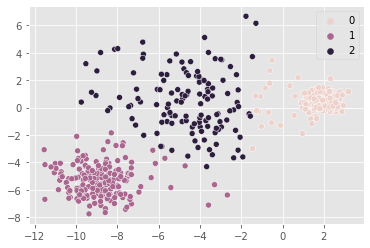

In [126]:
from sklearn_extra.cluster import KMedoids
X = varied[0]
varied_KMedoids_3 = KMedoids(n_clusters=3, random_state=0).fit(X)
sns.scatterplot(x = varied[0][:,0], y = varied[0][:,1], hue=varied_KMedoids_3.labels_)


<AxesSubplot:>

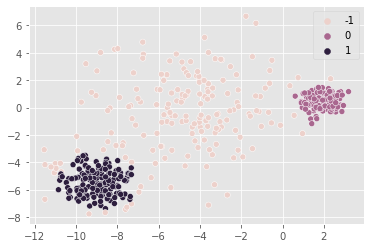

In [128]:
from sklearn.cluster import DBSCAN

X = varied[0]
varied_DBSCAN = DBSCAN(eps=0.6, min_samples=10).fit(X)
sns.scatterplot(x = varied[0][:,0], y = varied[0][:,1], hue=varied_DBSCAN.labels_)

<AxesSubplot:>

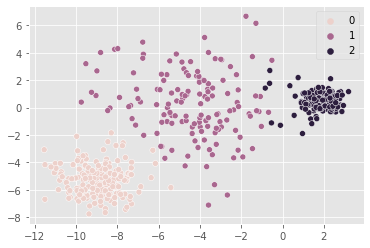

In [129]:
from sklearn.cluster import SpectralClustering

X = varied[0]
varied_SpectralClustering = SpectralClustering(n_clusters=3,n_components=2,random_state=0,eigen_solver='arpack').fit(X)
sns.scatterplot(x = varied[0][:,0], y = varied[0][:,1], hue=varied_SpectralClustering.labels_)

I prefer spectral in this  case, if I want to preserve elements thar are a litte far from center of their cluster.